## 🥔 Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### I. Importing Librairies

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

We first use the splitfolder library to split our raw data into 3 datasets: the training (80%), validation (10%) and the testing dataset  (10%).

`splitfolders --output ../data/dataset --ratio 0.7 0.1 0.2 -- ../data/raw/PlantVillage/`

Seting up all the Constants

In [2]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=20

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
        '../data/dataset/train',
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse",
)

Found 1506 images belonging to 3 classes.


In [18]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [19]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

validation_generator = validation_datagen.flow_from_directory(
        '../data/dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [20]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '../data/dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


Let's visualize some of the images from our dataset

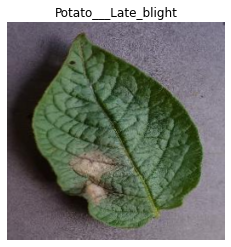

In [21]:
plt.figure(figsize=(12,4))

for image_batch, label_batch in train_generator:
    plt.imshow(image_batch[0])
    plt.title(class_names[int(label_batch[0])])
    plt.axis("off")
    break

### II. Model Building

We will use a CNN coupled with a Softmax activation in the output layer. 

In [22]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

#### Let's compile the model

We use `adam` optimizer, `SparseCategoricalCrossentropy`for losses and `accuracy` as a metric.

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/20
47/47 [==============================] - 169s 4s/step - loss: 0.8981 - accuracy: 0.4688 - val_loss: 0.9137 - val_accuracy: 0.5208
Epoch 2/20
47/47 [==============================] - 177s 4s/step - loss: 0.6845 - accuracy: 0.6906 - val_loss: 0.6283 - val_accuracy: 0.6927
Epoch 3/20
47/47 [==============================] - 159s 3s/step - loss: 0.4905 - accuracy: 0.7795 - val_loss: 0.7064 - val_accuracy: 0.7448
Epoch 4/20
47/47 [==============================] - 151s 3s/step - loss: 0.4155 - accuracy: 0.8161 - val_loss: 0.3856 - val_accuracy: 0.8490
Epoch 5/20
47/47 [==============================] - 149s 3s/step - loss: 0.3260 - accuracy: 0.8826 - val_loss: 0.6352 - val_accuracy: 0.6458
Epoch 6/20
47/47 [==============================] - 172s 4s/step - loss: 0.3392 - accuracy: 0.8697 - val_loss: 0.3404 - val_accuracy: 0.8802
Epoch 7/20
47/47 [==============================] - 151s 3s/step - loss: 0.1865 - accuracy: 0.9301 - val_loss: 0.1563 - val_accuracy: 0.9583
Epoch 8/20
47

In [26]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 21s 1s/step - loss: 0.2331 - accuracy: 0.9118


📈 Plotting the Accuracy and Loss Curves

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

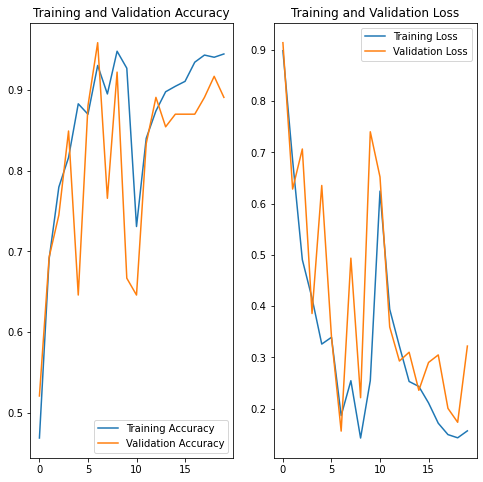

In [28]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### III. Prediction on a sample image

First image to predict
Actual label: Potato___Early_blight
1/1 [==============================] - 1s 1s/step
Predicted label: Potato___Early_blight


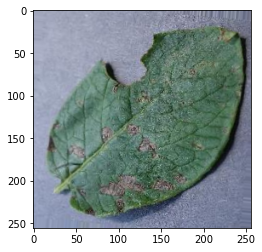

In [29]:
import numpy as np

for image_batch, label_batch in test_generator:

    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("First image to predict")
    plt.imshow(first_image)
    print(f"Actual label: {class_names[first_label]}")
    
    batch_prediction = model.predict(image_batch)
    print(f"Predicted label: {class_names[np.argmax(batch_prediction[0])]}")
    
    break

Let's write a function for inference

In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 147ms/step


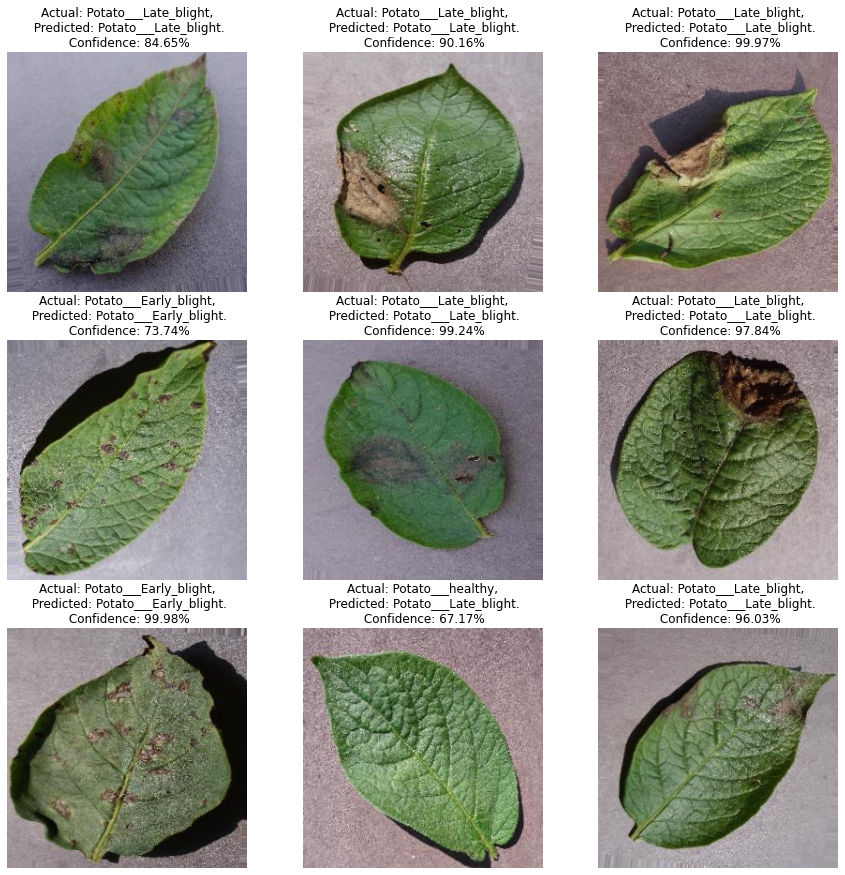

In [31]:
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

#### IV. Saving the Model

In [32]:
model.save("../models/potatoes.h5")